In [1]:
#IMPORTANT
#Code below makes sure all the code in each cell is outputted
#Code from Programming for Business Analytics Workbooks

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#IMPORTING RELEVANT PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
#IMPORTING RELEVANT DATASETS

education_df = pd.read_csv("05. Education Index Table.csv")
employment_df = pd.read_csv("05. Employment Index Table.csv")
entertainment_df = pd.read_csv("05. Entertainment Index Table.csv")
retail_df = pd.read_csv("05. Retail Index Table.csv")

In [4]:
#SELECTING RELEVANT COLUMNS
#Omitting the Raw Score Column as it is not used

education_df = education_df[["Origin", "Rebased Score", "Grade", "Activity Category"]]
employment_df = employment_df[["Origin", "Rebased Score", "Grade", "Activity Category"]]
entertainment_df = entertainment_df[["Origin", "Rebased Score", "Grade", "Activity Category"]]
retail_df = retail_df[["Origin", "Rebased Score", "Grade", "Activity Category"]]

In [5]:
#COMBINING INDIVIDUAL INDEXES
#Concatenating Dataframes to make one large dataframe with all the relevant data

dataframes1 = [education_df, employment_df, entertainment_df, retail_df]
all_df = pd.concat(dataframes1)
all_df.shape

(132, 4)

In [6]:
#CREATING VARIABLES FOR ACTIVITY WEIGHTINGS
#Weights will be used to calculated the total weighted scores and grades for each borough

education_weight = 0.146993318
employment_weight = 0.318485523
entertainment_weight = 0.124721604
retail_weight = 0.409799555

In [7]:
#CREATING WEIGHTED SCORE COLUMN
#Weighted scores are calculated by matching activity weight with the correct activity score

conditions1 = [
    (all_df["Activity Category"] == "Education"),
    (all_df["Activity Category"] == "Employment"),
    (all_df["Activity Category"] == "Entertainment"),
    (all_df["Activity Category"] == "Retail"),
]

values1 = [all_df["Rebased Score"]*education_weight, all_df["Rebased Score"]*employment_weight, all_df["Rebased Score"]*entertainment_weight, all_df["Rebased Score"]*retail_weight,]

all_df["Weighted Score"] = np.select(conditions1, values1)
all_df.head()

,Origin,Rebased Score,Grade,Activity Category,Weighted Score
0,Richmond upon Thames,7.048984,F,Education,1.036154
1,Bromley,8.004779,F,Education,1.176649
2,Kingston upon Thames,8.482676,F,Education,1.246897
3,Barnet,10.035842,E,Education,1.475202
4,Hillingdon,10.274791,E,Education,1.510326


In [8]:
#GROUPING TABLE BY BOROUGH
#By grouping table by Borough Weighted scores for each category of activty can be added to provide one weighted score

all_df = all_df[["Origin", "Weighted Score"]].groupby("Origin").sum()
all_df.head()

,Weighted Score
Origin,
Barking and Dagenham,11.613337
Barnet,7.611724
Bexley,10.320441
Brent,19.393875
Bromley,2.707203


In [9]:
#RENAMING INDIVIDUAL INDEX TABLES COLUMNS
#Columns are being renamed as these will be added to final index table
#Through naming these columns based on the category of activity they will are distinguishable

dataframes = [education_df, employment_df, entertainment_df, retail_df]
columns = ["Education", "Employment", "Entertainment", "Retail"]

education_df.rename(columns={"Rebased Score": "Education Score"}, inplace=True)
education_df.rename(columns={"Grade": "Education Grade"}, inplace=True)
employment_df.rename(columns={"Rebased Score": "Employment Score"}, inplace=True)
employment_df.rename(columns={"Grade": "Employment Grade"}, inplace=True)
entertainment_df.rename(columns={"Rebased Score": "Entertainment Score"}, inplace=True)
entertainment_df.rename(columns={"Grade": "Entertainment Grade"}, inplace=True)
retail_df.rename(columns={"Rebased Score": "Retail Score"}, inplace=True)
retail_df.rename(columns={"Grade": "Retail Grade"}, inplace=True)

In [10]:
#SELECTING RELAVENT COLUMNS FROM INDIVIDUAL INDEX TABLES
#These are the columns are the ones which will be added to final index table

sub_education = education_df.iloc[:, 0:3]
sub_employment = employment_df.iloc[:, 0:3]
sub_entertainment = entertainment_df.iloc[:, 0:3]
sub_retail = retail_df.iloc[:, 0:3]

In [11]:
#MERGING INDIVIDUAL ACTIVITY CATEGORIES INFO TO FINAL INDEX
#Grades and Scores for individual activities are added to the table

dataframes2 = [sub_education, sub_employment, sub_entertainment, sub_retail, all_df]

final_index = reduce(lambda  left,right: pd.merge(left,right,on=["Origin"]), dataframes2)
final_index.head()

,Origin,Education Score,Education Grade,Employment Score,Employment Grade,Entertainment Score,Entertainment Grade,Retail Score,Retail Grade,Weighted Score
0,Richmond upon Thames,7.048984,F,7.049377,F,13.526814,E,2.127660,F,5.840278
1,Bromley,8.004779,F,2.819270,F,5.072555,F,0.000000,F,2.707203
2,Kingston upon Thames,8.482676,F,4.242222,F,10.574132,E,6.382979,F,6.532548
3,Barnet,10.035842,E,12.320170,E,17.741325,E,0.000000,F,7.611724
4,Hillingdon,10.274791,E,3.920281,F,4.958991,F,3.191489,F,4.685243


In [12]:
#ASSIGNING GRADES
#Boroughs are given grades based on their Weighted scores:
#A+ for 90 and above
#A for 80 and above
#B for 60 and above
#C for 40 and above
#D for 20 and above
#E for 10 and above
#F for below 10

conditions2 = [
    (final_index["Weighted Score"] >= 90),
    (final_index["Weighted Score"] >= 80),
    (final_index["Weighted Score"] >= 60),
    (final_index["Weighted Score"] >= 40),
    (final_index["Weighted Score"] >= 20),
    (final_index["Weighted Score"] >= 10),
    (final_index["Weighted Score"] < 10),
]

values2 = ["A+", "A", "B", "C", "D", "E", "F"]

final_index["Weighted Grade"] = np.select(conditions2, values2)
final_index.head()

,Origin,Education Score,Education Grade,Employment Score,Employment Grade,Entertainment Score,Entertainment Grade,Retail Score,Retail Grade,Weighted Score,Weighted Grade
0,Richmond upon Thames,7.048984,F,7.049377,F,13.526814,E,2.127660,F,5.840278,F
1,Bromley,8.004779,F,2.819270,F,5.072555,F,0.000000,F,2.707203,F
2,Kingston upon Thames,8.482676,F,4.242222,F,10.574132,E,6.382979,F,6.532548,F
3,Barnet,10.035842,E,12.320170,E,17.741325,E,0.000000,F,7.611724,F
4,Hillingdon,10.274791,E,3.920281,F,4.958991,F,3.191489,F,4.685243,F


In [13]:
#ORDERING AND RENAMING COLUMNS + SORTING VALUES FOR FINAL INDEX

column_order = ["Origin", "Weighted Grade", "Education Grade", "Employment Grade", "Entertainment Grade", "Retail Grade", "Weighted Score", "Education Score", "Employment Score", "Entertainment Score", "Retail Score"]
final_index = final_index[column_order].sort_values(by="Weighted Score", ascending=False)
final_index.rename(columns = {"Origin" : "Borough"}, inplace="True")
final_index

,Borough,Weighted Grade,Education Grade,Employment Grade,Entertainment Grade,Retail Grade,Weighted Score,Education Score,Employment Score,Entertainment Score,Retail Score
32,City of London,A+,A+,A+,A+,A+,100.000000,100.000000,100.000000,100.000000,100.000000
31,Westminster,B,A,B,A,B,76.498745,85.304659,74.076691,89.463722,71.276596
29,Kensington and Chelsea,B,B,C,B,C,60.471099,68.339307,58.010073,74.410095,55.319149
30,Islington,C,B,C,B,D,50.749010,72.998805,59.258149,75.167192,28.723404
28,Camden,C,B,C,B,D,49.919378,64.994026,57.343140,72.353312,31.914894
27,Hammersmith and Fulham,C,C,C,C,D,40.631697,53.643967,45.521445,55.432177,27.659574
26,Haringey,D,C,C,C,D,37.426650,45.758662,41.839979,51.924290,26.595745
23,Tower Hamlets,D,D,C,C,E,33.827744,35.722820,48.257362,49.968454,17.021277
22,Lambeth,D,D,C,C,D,32.537587,28.912784,40.045768,51.141956,22.340426
25,Hackney,D,C,D,C,E,32.384389,41.338112,39.255875,47.772871,19.148936


<Figure size 1152x576 with 0 Axes>

<BarContainer object of 33 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text major ticklabel objects>)

Text(0.5, 0, 'Boroughs')

Text(0, 0.5, 'Weighted Scores')

Text(0.5, 1.0, 'Weighted Scores by Borough')

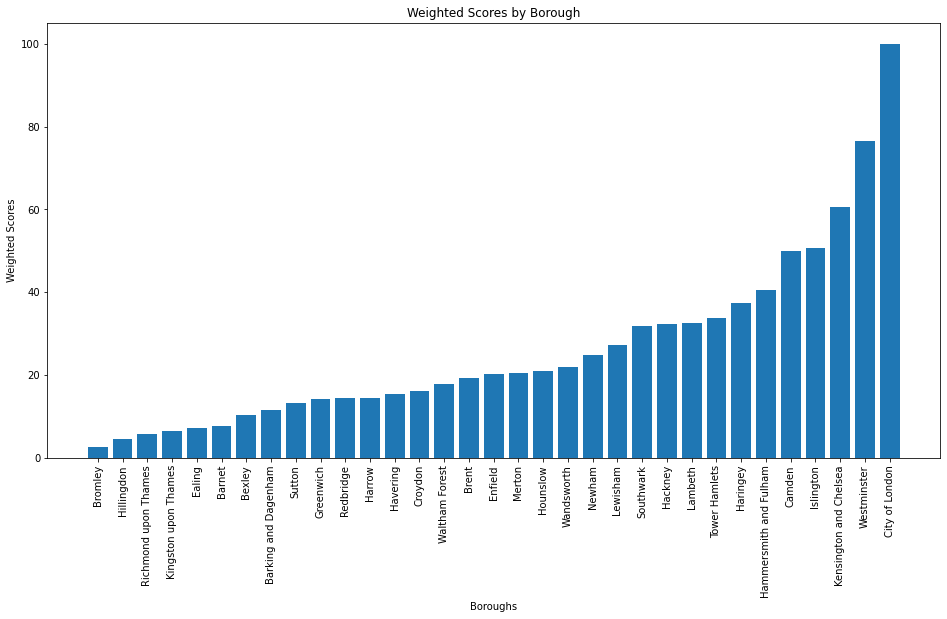

In [14]:
#VISUALISING WEIGHTED SCORES
#Boroughs weighted scores are shown in a bar chart in ascending order

index_chart = final_index.sort_values(by="Weighted Score", ascending=True)

plt.figure(figsize=(16, 8))
plt.bar(index_chart["Borough"], index_chart["Weighted Score"])
plt.xticks(rotation=90)
plt.xlabel('Boroughs')
plt.ylabel('Weighted Scores')
plt.title('Weighted Scores by Borough')
plt.show()

In [15]:
#SAVE AND EXPORT
#Saving the finshed dataframe
#After executing this line the file should be available on the left hand side of the screen

final_index.to_csv('07. Final Index Table.csv', index=False)